In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# All Fundamentalists

In [126]:
# df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/All_Fundamentalists.csv")
df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\All_Fundamentalists.csv")

df_fund = df[['Run Number', 'Market Price']]

df_fund.describe()

,Run Number,Market Price
count,1000.000000,1000.000000
mean,500.500000,99.675550
std,288.819436,1.006816
min,1.000000,96.850000
25%,250.750000,98.850000
50%,500.500000,99.850000
75%,750.250000,100.450000
max,1000.000000,104.450000


# All Speculators

In [127]:
# df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/All_Speculators.csv")
df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\All_Speculators.csv")

df_spec = df[['Run Number', 'Market Price']]

df_spec.describe()

,Run Number,Market Price
count,1000.000000,1000.000000
mean,500.500000,77.633600
std,288.819436,29.965658
min,1.000000,9.400000
25%,250.750000,56.350000
50%,500.500000,72.800000
75%,750.250000,94.925000
max,1000.000000,168.750000


# 50 50 Split

In [128]:
# df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/50_50_Agents.csv")
df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\50_50_Agents.csv")

df_50_50 = df[['Run Number', 'Market Price']]

df_50_50.describe()

,Run Number,Market Price
count,1000.000000,1000.000000
mean,500.500000,92.490650
std,288.819436,5.461424
min,1.000000,69.200000
25%,250.750000,89.300000
50%,500.500000,92.975000
75%,750.250000,96.350000
max,1000.000000,104.500000


# Adding Speculators 

## 5% Dilution

In [129]:
# df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/test.csv")
df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Spec_Change_100.csv")

volatility_columns = [f'Cycle {i} Volatility' for i in range(1, 11)]
average_price_columns = [f'Cycle {i} Average Price' for i in range(1, 11)]
average_spec_columns = [f'Cycle {i} Speculator Proportion' for i in range(1, 11)]

volatility_averages = df[volatility_columns].mean()
average_price_averages = df[average_price_columns].mean()
spec_proportion_averages = df[average_spec_columns].mean()

result_5p = pd.DataFrame({
    'Cycle': [f'{i}' for i in range(1, 11)],
    'Average Price': average_price_averages.values,
    'Volatility': volatility_averages.values,
    'Speculator Proportion': spec_proportion_averages.values
})
result_5p
result_5p.describe()

,Average Price,Volatility,Speculator Proportion
count,10.000000,10.000000,10.000000
mean,58.071259,13.018899,72.500000
std,38.871364,9.324785,15.138252
min,1.791572,0.864653,50.000000
25%,23.739855,4.552507,61.250000
50%,69.357055,12.073083,72.500000
75%,90.600042,21.223261,83.750000
max,100.033509,26.883466,95.000000


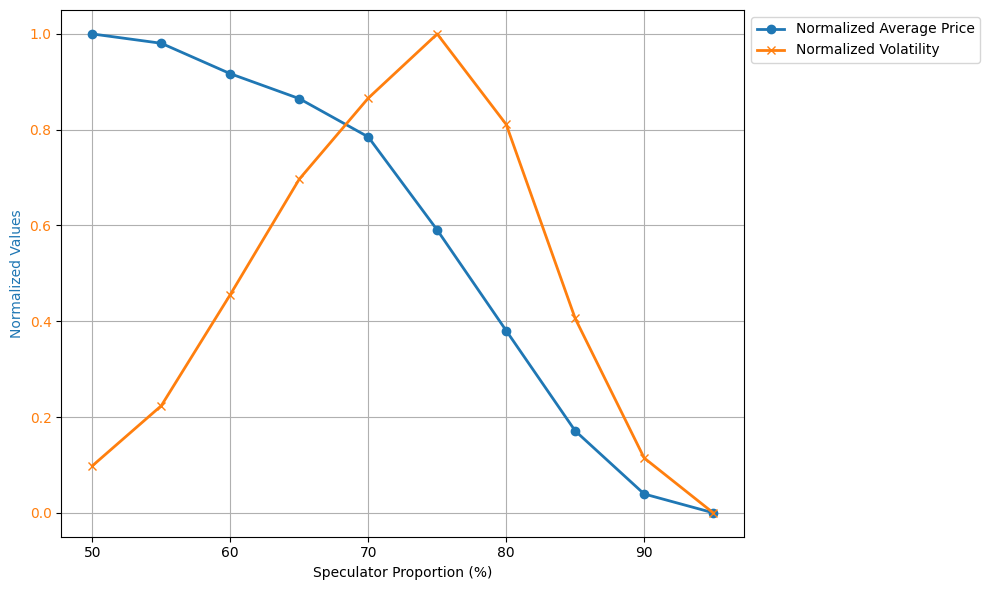

In [130]:
# Normalize Average Price and Volatility
normalized_avg_price = (result_5p['Average Price'] - result_5p['Average Price'].min()) / (result_5p['Average Price'].max() - result_5p['Average Price'].min())
normalized_volatility = (result_5p['Volatility'] - result_5p['Volatility'].min()) / (result_5p['Volatility'].max() - result_5p['Volatility'].min())

# Create a figure and a single axis
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Normalized Average Price
color1 = 'tab:blue'
ax.set_xlabel('Speculator Proportion (%)')
ax.set_ylabel('Normalized Values', color=color1)
line1, = ax.plot(result_5p['Speculator Proportion'], normalized_avg_price, 
                  color=color1, linestyle='-', linewidth=2, marker='o', label='Normalized Average Price')
ax.tick_params(axis='y', labelcolor=color1)
ax.grid(True)

# Line plot for Normalized Volatility on the same y-axis
color2 = 'tab:orange'
line2, = ax.plot(result_5p['Speculator Proportion'], normalized_volatility, 
                  color=color2, linestyle='-', linewidth=2, marker='x', label='Normalized Volatility')
ax.tick_params(axis='y', labelcolor=color2)

# Adding legends
ax.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to avoid overlap
fig.tight_layout()
plt.show()



## 2.5% Dilution

In [131]:
# df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/test.csv")
df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Spec_Change_50.csv")

volatility_columns = [f'Cycle {i} Volatility' for i in range(1, 11)]
average_price_columns = [f'Cycle {i} Average Price' for i in range(1, 11)]
average_spec_columns = [f'Cycle {i} Speculator Proportion' for i in range(1, 11)]

volatility_averages = df[volatility_columns].mean()
average_price_averages = df[average_price_columns].mean()
spec_proportion_averages = df[average_spec_columns].mean()

result_25p = pd.DataFrame({
    'Cycle': [f'{i}' for i in range(1, 11)],
    'Average Price': average_price_averages.values,
    'Volatility': volatility_averages.values,
    'Speculator Proportion': spec_proportion_averages.values
})
result_25p

,Cycle,Average Price,Volatility,Speculator Proportion
0,1,99.990406,3.433862,50.0
1,2,98.728829,5.593636,52.5
2,3,94.996507,8.204336,55.0
3,4,95.027474,9.599125,57.5
4,5,92.090386,12.356849,60.0
5,6,86.090534,17.416625,62.5
6,7,78.395263,22.035981,65.0
7,8,69.569551,24.372385,67.5
8,9,64.371310,25.208276,70.0
9,10,52.673974,23.194405,72.5


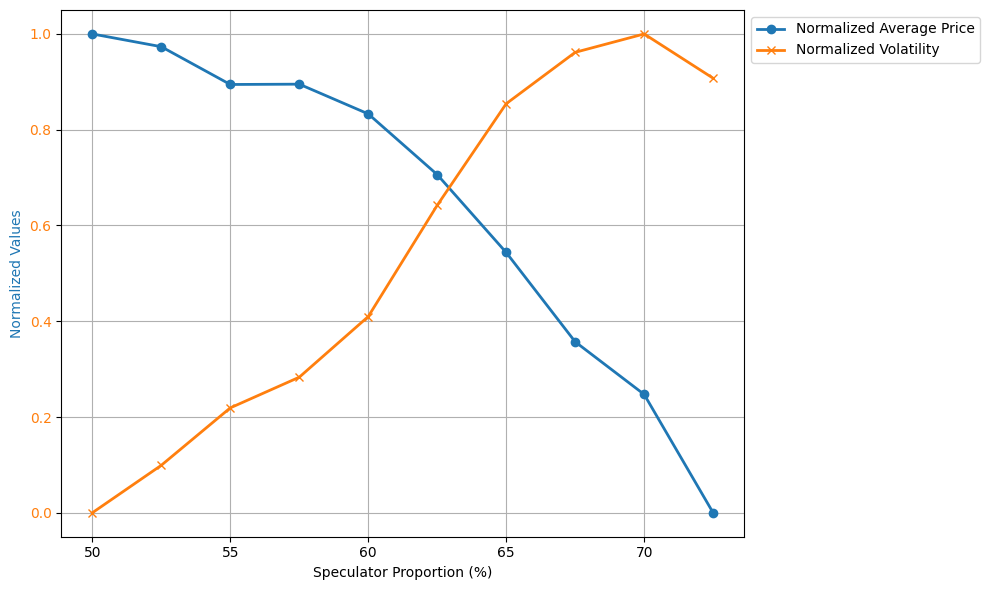

In [132]:
# Normalize Average Price and Volatility
normalized_avg_price = (result_25p['Average Price'] - result_25p['Average Price'].min()) / (result_25p['Average Price'].max() - result_25p['Average Price'].min())
normalized_volatility = (result_25p['Volatility'] - result_25p['Volatility'].min()) / (result_25p['Volatility'].max() - result_25p['Volatility'].min())

# Create a figure and a single axis
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Normalized Average Price
color1 = 'tab:blue'
ax.set_xlabel('Speculator Proportion (%)')
ax.set_ylabel('Normalized Values', color=color1)
line1, = ax.plot(result_25p['Speculator Proportion'], normalized_avg_price, 
                  color=color1, linestyle='-', linewidth=2, marker='o', label='Normalized Average Price')
ax.tick_params(axis='y', labelcolor=color1)
ax.grid(True)

# Line plot for Normalized Volatility on the same y-axis
color2 = 'tab:orange'
line2, = ax.plot(result_25p['Speculator Proportion'], normalized_volatility, 
                  color=color2, linestyle='-', linewidth=2, marker='x', label='Normalized Volatility')
ax.tick_params(axis='y', labelcolor=color2)

# Adding legends
ax.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to avoid overlap
fig.tight_layout()
plt.show()



## 1% Dilution

In [133]:
# df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Spec_Change_20.csv")
df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Spec_Change_20.csv")

volatility_columns = [f'Cycle {i} Volatility' for i in range(1, 11)]
average_price_columns = [f'Cycle {i} Average Price' for i in range(1, 11)]
average_spec_columns = [f'Cycle {i} Speculator Proportion' for i in range(1, 11)]

volatility_averages = df[volatility_columns].mean()
average_price_averages = df[average_price_columns].mean()
spec_proportion_averages = df[average_spec_columns].mean()

rest_1p = pd.DataFrame({
    'Cycle': [f'{i}' for i in range(1, 11)],
    'Average Price': average_price_averages.values,
    'Volatility': volatility_averages.values,
    'Speculator Proportion': spec_proportion_averages.values
})
rest_1p

,Cycle,Average Price,Volatility,Speculator Proportion
0,1,100.001346,3.392233,50.0
1,2,98.914114,5.215210,51.0
2,3,96.432635,6.079137,52.0
3,4,97.091509,6.220629,53.0
4,5,96.175141,6.608158,54.0
5,6,94.195353,7.742088,55.0
6,7,92.101917,9.510873,56.0
7,8,89.641349,11.037409,57.0
8,9,87.048484,13.036214,58.0
9,10,84.542997,14.887706,59.0


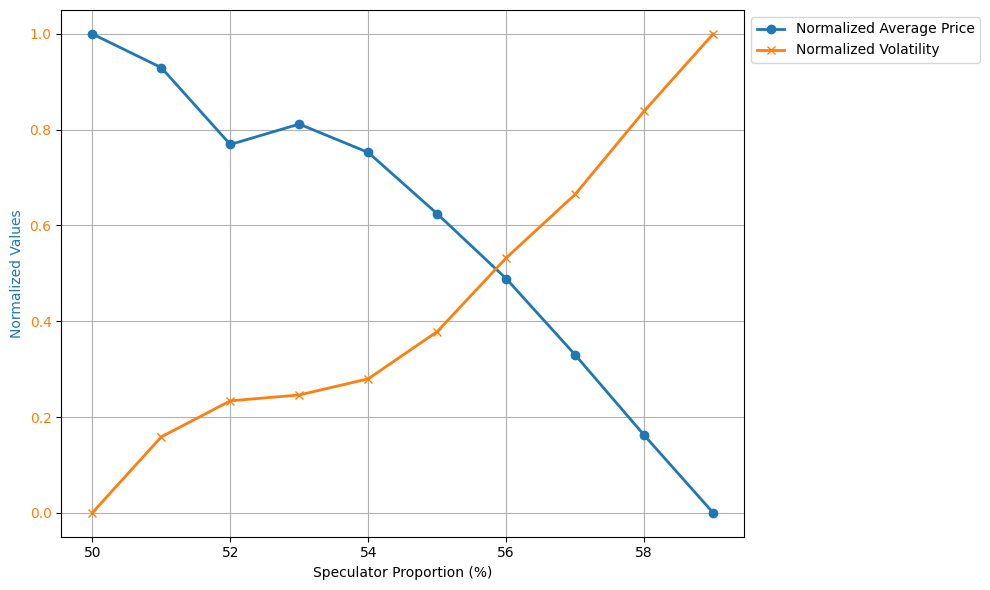

In [134]:
# Normalize Average Price and Volatility
rest_1p
normalized_avg_price = (rest_1p['Average Price'] - rest_1p['Average Price'].min()) / (rest_1p['Average Price'].max() - result['Average Price'].min())
normalized_volatility = (rest_1p['Volatility'] - rest_1p['Volatility'].min()) / (rest_1p['Volatility'].max() - result['Volatility'].min())

# Create a figure and a single axis
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Normalized Average Price
color1 = 'tab:blue'
ax.set_xlabel('Speculator Proportion (%)')
ax.set_ylabel('Normalized Values', color=color1)
line1, = ax.plot(rest_1p['Speculator Proportion'], normalized_avg_price, 
                  color=color1, linestyle='-', linewidth=2, marker='o', label='Normalized Average Price')
ax.tick_params(axis='y', labelcolor=color1)
ax.grid(True)

# Line plot for Normalized Volatility on the same y-axis
color2 = 'tab:orange'
line2, = ax.plot(rest_1p['Speculator Proportion'], normalized_volatility, 
                  color=color2, linestyle='-', linewidth=2, marker='x', label='Normalized Volatility')
ax.tick_params(axis='y', labelcolor=color2)

# Adding legends
ax.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to avoid overlap
fig.tight_layout()
plt.show()



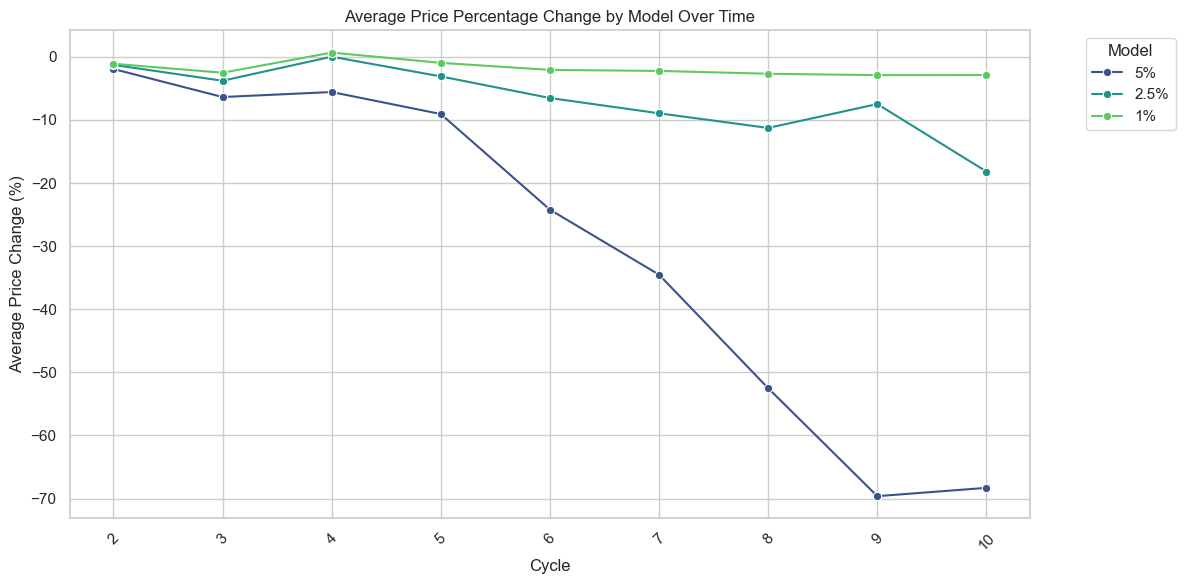

In [143]:
result_5p['Dilution Model'] = '5%'
result_25p['Dilution Model'] = '2.5%'
rest_1p['Dilution Model'] = '1%'

combined_df = pd.concat([result_5p, result_25p, rest_1p], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)

combined_df['Average Price Change (%)'] = combined_df.groupby('Dilution Model')['Average Price'].pct_change() * 100


sns.set(style="whitegrid")
# Create a new figure and axis
plt.figure(figsize=(12, 6))
# Line plot for Average Price Change (%) for each model
sns.lineplot(data=combined_df.dropna(subset=['Average Price Change (%)']),
             x='Cycle', y='Average Price Change (%)',
             hue='Dilution Model', palette='viridis', marker='o')

# Adding titles and labels
plt.title('Average Price Percentage Change by Model Over Time')
plt.xlabel('Cycle')
plt.ylabel('Average Price Change (%)')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

combined_df.describe()

In [148]:
grouped_stats = combined_df.groupby(['Dilution Model'])['Average Price Change (%)'].agg(['mean', 'std']).reset_index()

print(grouped_stats)

  Dilution Model       mean        std
0             1%  -1.842200   1.186118
1           2.5%  -6.717294   5.639885
2             5% -30.226857  27.339466
